In [1]:
import numpy as np
import pandas as pd
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [2]:
combined = pd.read_csv("./data/combined_data.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,26049.0,0.0,26663.0,4871.0,4.8564,0.0,0.0,0.1742,4.951,0.0,0.0,0.0114,3.1034,0.8962,1.2252
2012-01-01 01:00:00+00:00,26053.0,0.0,26663.0,5409.0,5.0145,0.0,0.0,0.1624,5.200,0.0,0.0,0.0158,3.0225,0.8915,1.2242
2012-01-01 02:00:00+00:00,26053.0,0.0,26663.0,6094.0,5.2142,0.0,0.0,0.1637,5.468,0.0,0.0,0.0133,2.9386,0.8980,1.2230
2012-01-01 03:00:00+00:00,26053.0,0.0,26663.0,6734.0,5.4012,0.0,0.0,0.1486,5.767,0.0,0.0,0.0077,2.8491,0.9047,1.2214
2012-01-01 04:00:00+00:00,26053.0,0.0,26663.0,7370.0,5.5646,0.0,0.0,0.1386,6.038,0.0,0.0,0.0024,2.7522,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634.0,0.0,49021.0,15303.0,4.2129,0.0,0.0,0.0079,-1.932,0.0,0.0,0.0017,0.0617,0.4790,1.2769
2016-12-31 20:00:00+00:00,40634.0,0.0,49021.0,15354.0,4.2875,0.0,0.0,0.0080,-2.090,0.0,0.0,0.0022,0.0631,0.4962,1.2775
2016-12-31 21:00:00+00:00,40634.0,0.0,49021.0,14848.0,4.2965,0.0,0.0,0.0075,-2.289,0.0,0.0,0.0022,0.0646,0.4924,1.2782


In [3]:
wind = combined[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
wind

,wind_generation_actual,wind_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
utc_timestamp,,,,,,,,,,,
2012-01-01 00:00:00+00:00,4871.0,26663.0,4.8564,0.0,0.0,0.0,0.0,0.1742,0.0114,0.8962,1.2252
2012-01-01 01:00:00+00:00,5409.0,26663.0,5.0145,0.0,0.0,0.0,0.0,0.1624,0.0158,0.8915,1.2242
2012-01-01 02:00:00+00:00,6094.0,26663.0,5.2142,0.0,0.0,0.0,0.0,0.1637,0.0133,0.8980,1.2230
2012-01-01 03:00:00+00:00,6734.0,26663.0,5.4012,0.0,0.0,0.0,0.0,0.1486,0.0077,0.9047,1.2214
2012-01-01 04:00:00+00:00,7370.0,26663.0,5.5646,0.0,0.0,0.0,0.0,0.1386,0.0024,0.9215,1.2199
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,49021.0,4.2129,0.0,0.0,0.0,0.0,0.0079,0.0017,0.4790,1.2769
2016-12-31 20:00:00+00:00,15354.0,49021.0,4.2875,0.0,0.0,0.0,0.0,0.0080,0.0022,0.4962,1.2775
2016-12-31 21:00:00+00:00,14848.0,49021.0,4.2965,0.0,0.0,0.0,0.0,0.0075,0.0022,0.4924,1.2782


In [4]:
# Assuming 'wind' is your DataFrame

# Shift the wind_generation_actual column
for i in range(1, 7):
    wind[f'wind_generation_t+{i}'] = wind['wind_generation_actual'].shift(periods=i)

# Drop the first 6 rows
wind = wind.drop(wind.index[:6])

# Split the data into train and test sets
train, test = train_test_split(wind, test_size=0.2, random_state=3)

# Features
features = ['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal',
            'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall',
            'cloud_cover', 'air_density']

# Create X_train and X_test
X_train = train[features]
X_test = test[features]

# Create a list to iterate through and train and validate the models for each duration: t+1h, t+2h, t+3h, etc.
y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Impute missing values in features using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Impute missing values in the target variable
y_train_imputed = imputer.fit_transform(train[y_list])
y_test_imputed = imputer.transform(test[y_list])

# we train and validate the LinearRegression for all forecast durations (1 to 6h)
lr = LinearRegression()
for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train_imputed, y_train_imputed[:, i], cv=5)
    print(f"\nThe average score linear regression for t+{i + 1}h is: %0.3f" % np.mean(scores_wind))
    # validation of the model
    lr.fit(X_train_imputed, y_train_imputed[:, i])
    predictions_lr = lr.predict(X_test_imputed)
    r2 = r2_score(y_test_imputed[:, i], predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i + 1}h is r2 = %0.3f" % r2)

<ipython-input-4-8b114b4fb17a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind[f'wind_generation_t+{i}'] = wind['wind_generation_actual'].shift(periods=i)
<ipython-input-4-8b114b4fb17a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind[f'wind_generation_t+{i}'] = wind['wind_generation_actual'].shift(periods=i)
<ipython-input-4-8b114b4fb17a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.990

The average score linear regression for t+2h is: 0.965
The R2 score of the linear regression model for t+2h is r2 = 0.963

The average score linear regression for t+3h is: 0.932
The R2 score of the linear regression model for t+3h is r2 = 0.928

The average score linear regression for t+4h is: 0.893
The R2 score of the linear regression model for t+4h is r2 = 0.890

The average score linear regression for t+5h is: 0.852
The R2 score of the linear regression model for t+5h is r2 = 0.852

The average score linear regression for t+6h is: 0.811
The R2 score of the linear regression model for t+6h is r2 = 0.815


In [5]:
train_clean = train.replace([np.inf, -np.inf], np.nan).dropna()

# Separate the target variable and features after removing NaN or inf values
y_train_clean = train_clean['wind_generation_t+1']
X_train_clean = train_clean.drop('wind_generation_t+1', axis=1)

# Fit the OLS model with the cleaned data
model = OLS(y_train_clean, X_train_clean).fit()

# Display the summary
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     wind_generation_t+1   R-squared (uncentered):                   1.000
Model:                             OLS   Adj. R-squared (uncentered):              1.000
Method:                  Least Squares   F-statistic:                          4.898e+06
Date:                 Tue, 26 Dec 2023   Prob (F-statistic):                        0.00
Time:                         13:45:50   Log-Likelihood:                     -2.3427e+05
No. Observations:                35064   AIC:                                  4.686e+05
Df Residuals:                    35048   BIC:                                  4.687e+05
Df Model:                           16                                                  
Covariance Type:             nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

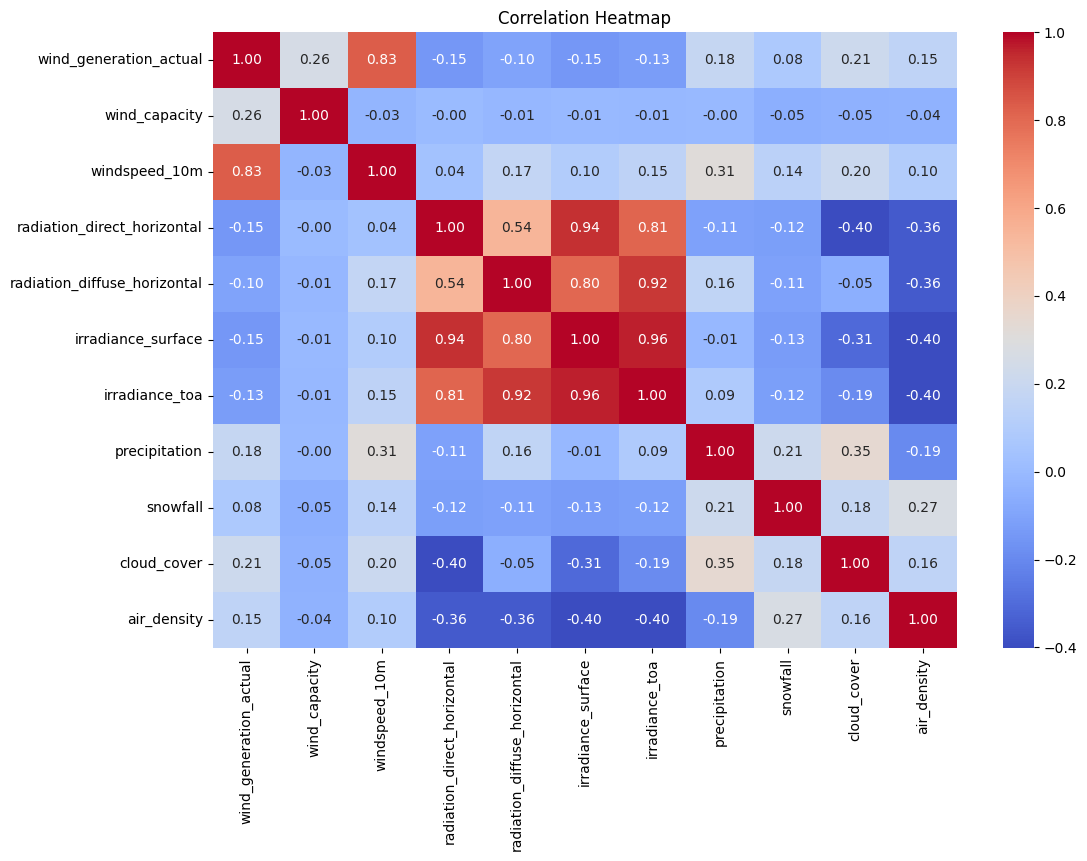

In [6]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Assuming 'train' and 'test' are your dataframes

# Define the features and target variables
X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]

# List of target variables
y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Initialize Linear Regression model
lr = LinearRegression()

# Loop through each target variable
for i in range(len(y_list)):
    # Handling NaN values in X_train
    imputer_X = SimpleImputer(strategy='mean')
    X_train_imputed = imputer_X.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)

    # Handling NaN values in y_train
    imputer_y = SimpleImputer(strategy='mean')
    y_train_imputed = imputer_y.fit_transform(train[y_list[i]].values.reshape(-1, 1))
    train[y_list[i]] = y_train_imputed.flatten()

    # Handling NaN values in X_test
    X_test_imputed = imputer_X.transform(X_test)
    X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

    # Handling NaN values in y_test
    y_test_imputed = imputer_y.transform(test[y_list[i]].values.reshape(-1, 1))

    # Training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))

    # Validation of the model
    lr.fit(X_train, train[y_list[i]])
    predictions_lr = lr.predict(X_test)
    
    # Evaluate R2 score on the imputed test data
    r2 = r2_score(y_test_imputed.flatten(), predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2)


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.989

The average score linear regression for t+2h is: 0.965
The R2 score of the linear regression model for t+2h is r2 = 0.963

The average score linear regression for t+3h is: 0.931
The R2 score of the linear regression model for t+3h is r2 = 0.928

The average score linear regression for t+4h is: 0.893
The R2 score of the linear regression model for t+4h is r2 = 0.889

The average score linear regression for t+5h is: 0.852
The R2 score of the linear regression model for t+5h is r2 = 0.851

The average score linear regression for t+6h is: 0.810
The R2 score of the linear regression model for t+6h is r2 = 0.814


In [8]:
X_train = train[['wind_generation_actual', 'windspeed_10m']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'windspeed_10m']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [9]:
# Create a Linear Regression model
lr = LinearRegression()

# Handling NaN values in X_train
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)

# Loop through each target variable in y_list
for i in range(len(y_list)):
    # Handling NaN values in y_train
    imputer_y = SimpleImputer(strategy='mean')
    y_train_imputed = imputer_y.fit_transform(train[y_list[i]].values.reshape(-1, 1))

    # Training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train_imputed, y_train_imputed.flatten(), cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))

    # Validation of the model
    lr.fit(X_train_imputed, y_train_imputed.flatten())
    X_test_imputed = imputer_X.transform(X_test)
    predictions_lr = lr.predict(X_test_imputed)
    
    # Handling NaN values in y_test if necessary
    imputer_y_test = SimpleImputer(strategy='mean')
    y_test_imputed = imputer_y_test.fit_transform(test[y_list[i]].values.reshape(-1, 1))

    # Calculate R2 score after handling NaN values in y_test
    r2 = r2_score(y_test_imputed, predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2)


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.989

The average score linear regression for t+2h is: 0.964
The R2 score of the linear regression model for t+2h is r2 = 0.963

The average score linear regression for t+3h is: 0.930
The R2 score of the linear regression model for t+3h is r2 = 0.927

The average score linear regression for t+4h is: 0.891
The R2 score of the linear regression model for t+4h is r2 = 0.888

The average score linear regression for t+5h is: 0.850
The R2 score of the linear regression model for t+5h is r2 = 0.850

The average score linear regression for t+6h is: 0.808
The R2 score of the linear regression model for t+6h is r2 = 0.812


In [10]:
X_train = train[['wind_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

In [11]:
# Assuming lr is already defined
lr = LinearRegression()

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Impute missing values in the target variable
y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

for i in range(len(y_list)):
    # Training of the model via cross-validation
    scores_wind = cross_val_score(lr, X_train_imputed, train[y_list[i]], cv=5)
    print(f"\nThe average score linear regression for t+{i+1}h is: %0.3f" % np.mean(scores_wind))

    # Impute missing values in the target variable
    y_train_imputed = imputer.fit_transform(train[[y_list[i]]])
    y_test_imputed = imputer.transform(test[[y_list[i]]])

    # Validation of the model
    lr.fit(X_train_imputed, y_train_imputed)
    predictions_lr = lr.predict(X_test_imputed)

    # Calculate R2 score, handling NaN values in y_true
    r2 = r2_score(y_test_imputed, predictions_lr)
    print(f"The R2 score of the linear regression model for t+{i+1}h is r2 = %0.3f" % r2)


The average score linear regression for t+1h is: 0.990
The R2 score of the linear regression model for t+1h is r2 = 0.989

The average score linear regression for t+2h is: 0.964
The R2 score of the linear regression model for t+2h is r2 = 0.963

The average score linear regression for t+3h is: 0.930
The R2 score of the linear regression model for t+3h is r2 = 0.926

The average score linear regression for t+4h is: 0.891
The R2 score of the linear regression model for t+4h is r2 = 0.888

The average score linear regression for t+5h is: 0.849
The R2 score of the linear regression model for t+5h is r2 = 0.849

The average score linear regression for t+6h is: 0.807
The R2 score of the linear regression model for t+6h is r2 = 0.811


In [12]:
import statsmodels.api as sm

# Assuming X_train is already defined
# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Replace infinite values with NaN and then impute NaN values
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_imputed = imputer.fit_transform(X_train_imputed)

# Let's fit the OLS model and get the summary
ols_model = sm.OLS(train['wind_generation_t+1'], sm.add_constant(X_train_imputed)).fit()
print(ols_model.summary())

                             OLS Regression Results                            
Dep. Variable:     wind_generation_t+1   R-squared:                       0.990
Model:                             OLS   Adj. R-squared:                  0.990
Method:                  Least Squares   F-statistic:                 3.324e+06
Date:                 Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                         13:46:14   Log-Likelihood:            -2.7527e+05
No. Observations:                35073   AIC:                         5.505e+05
Df Residuals:                    35071   BIC:                         5.506e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3086      4.978      7.29

In [13]:
# Assuming 'train' and 'test' DataFrames are defined

X_train = train[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_test = test[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]

y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train_imputed, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decision trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    
    # validation of the model
    rf.fit(X_train_imputed, train[y_list[i]])
    predictions_rf = rf.predict(X_test_imputed)
    
    # Replace NaN values with a specific value (e.g., 0) for R2 score calculation
    predictions_rf[np.isnan(predictions_rf)] = 0
    test[y_list[i]][np.isnan(test[y_list[i]])] = 0
    
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2)


The average score for random forest regression (100 decision trees) and t+1h is: 0.990
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.990

The average score for random forest regression (100 decision trees) and t+2h is: 0.968
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.967

The average score for random forest regression (100 decision trees) and t+3h is: 0.942
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.941

The average score for random forest regression (100 decision trees) and t+4h is: 0.916
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.918

The average score for random forest regression (100 decision trees) and t+5h is: 0.891
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.898

The average score for random forest regression (100 decision trees) and t+6h is: 0.870
Th

In [15]:
X_train = train[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'wind_capacity','windspeed_10m', 'irradiance_surface', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train_imputed, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decision trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    
    # validation of the model
    rf.fit(X_train_imputed, train[y_list[i]])
    predictions_rf = rf.predict(X_test_imputed)
    
    # Replace NaN values with a specific value (e.g., 0) for R2 score calculation
    predictions_rf[np.isnan(predictions_rf)] = 0
    test[y_list[i]][np.isnan(test[y_list[i]])] = 0
    
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2)


The average score for random forest regression (100 decision trees) and t+1h is: 0.990
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.990

The average score for random forest regression (100 decision trees) and t+2h is: 0.968
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.967

The average score for random forest regression (100 decision trees) and t+3h is: 0.942
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.941

The average score for random forest regression (100 decision trees) and t+4h is: 0.916
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.918

The average score for random forest regression (100 decision trees) and t+5h is: 0.892
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.898

The average score for random forest regression (100 decision trees) and t+6h is: 0.870
Th

In [16]:
X_train = train[['wind_generation_actual', 'windspeed_10m']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual', 'windspeed_10m']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train_imputed, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decision trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    
    # validation of the model
    rf.fit(X_train_imputed, train[y_list[i]])
    predictions_rf = rf.predict(X_test_imputed)
    
    # Replace NaN values with a specific value (e.g., 0) for R2 score calculation
    predictions_rf[np.isnan(predictions_rf)] = 0
    test[y_list[i]][np.isnan(test[y_list[i]])] = 0
    
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2)


The average score for random forest regression (100 decision trees) and t+1h is: 0.987
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.987

The average score for random forest regression (100 decision trees) and t+2h is: 0.957
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.956

The average score for random forest regression (100 decision trees) and t+3h is: 0.918
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.916

The average score for random forest regression (100 decision trees) and t+4h is: 0.872
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.870

The average score for random forest regression (100 decision trees) and t+5h is: 0.825
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.827

The average score for random forest regression (100 decision trees) and t+6h is: 0.777
Th

In [17]:
X_train = train[['wind_generation_actual']]
# y_train will depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

X_test = test[['wind_generation_actual']]
# y_test will also depend on the duration considered for the forecast (see below). It could be: t+1h, t+2h, t+3h, etc.

y_list = ['wind_generation_t+1', 'wind_generation_t+2', 'wind_generation_t+3',
          'wind_generation_t+4', 'wind_generation_t+5', 'wind_generation_t+6']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

for i in range(len(y_list)):
    # training of the model via cross-validation
    scores_wind = cross_val_score(rf, X_train_imputed, train[y_list[i]], cv=5)
    print(f"\nThe average score for random forest regression (100 decision trees) and t+{i+1}h is: %0.3f" % np.mean(scores_wind))
    
    # validation of the model
    rf.fit(X_train_imputed, train[y_list[i]])
    predictions_rf = rf.predict(X_test_imputed)
    
    # Replace NaN values with a specific value (e.g., 0) for R2 score calculation
    predictions_rf[np.isnan(predictions_rf)] = 0
    test[y_list[i]][np.isnan(test[y_list[i]])] = 0
    
    r2 = r2_score(test[y_list[i]], predictions_rf)
    print(f"The R2 score of the random forest regression (with 100 decision trees) for t+{i+1}h is r2 = %0.3f" % r2)



The average score for random forest regression (100 decision trees) and t+1h is: 0.986
The R2 score of the random forest regression (with 100 decision trees) for t+1h is r2 = 0.985

The average score for random forest regression (100 decision trees) and t+2h is: 0.951
The R2 score of the random forest regression (with 100 decision trees) for t+2h is r2 = 0.949

The average score for random forest regression (100 decision trees) and t+3h is: 0.904
The R2 score of the random forest regression (with 100 decision trees) for t+3h is r2 = 0.901

The average score for random forest regression (100 decision trees) and t+4h is: 0.850
The R2 score of the random forest regression (with 100 decision trees) for t+4h is r2 = 0.847

The average score for random forest regression (100 decision trees) and t+5h is: 0.793
The R2 score of the random forest regression (with 100 decision trees) for t+5h is r2 = 0.793

The average score for random forest regression (100 decision trees) and t+6h is: 0.734
Th